In [1]:
# 1. Read the superstore data and perform basic cleaning up of columns wherever necessary

In [2]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv("Superstore_sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Removing row id col
df.drop('Row ID', axis=1, inplace=True)

In [7]:
# Converting dates to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   

In [8]:
# Sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [9]:
# Setting the index to be the date for easier analysis 
df.set_index("Order Date", inplace = True)

In [10]:
################################################################################

In [11]:
# 2. Check for any missing values present. If yes, how would you treat those values?

In [12]:
df.isnull().sum()

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In order to handle the null values in postal code, we will not drop them, instead we will add the postal code of respective city.

For that we need to find the cities for which the postal code is not mentioned and then fill the postal code of the respective city into the postal code column

In [13]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


We can see that the postal code is not mentioned only for Burlington city in Vermont state. So, we need to fill the postal code of that city.

In [14]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city

In [15]:
# Checking again for null values
df.isnull().sum()

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [16]:
####################################################################################

In [17]:
# 3. Determine the most valuable customers from the superstore data

The Most Valuable Customers are those who are the most profitable for a company.
These customers buy more or higher-value products than the average customer.

In [18]:
# Sort the Customers as per the sales
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)

In [20]:
# Round off the Sales Value up to 2 decimal places
Top_customers = Top_customers[["Sales"]].round(2) 
Top_customers

,Sales
Customer Name,
Sean Miller,25043.05
Tamara Chand,19052.22
Raymond Buch,15117.34
Tom Ashbrook,14595.62
Adrian Barton,14473.57
Ken Lonsdale,14175.23
Sanjit Chand,14142.33
Hunter Lopez,12873.30
Sanjit Engle,12209.44


In [21]:
# Reset the index to add the customer name into dataframe
Top_customers.reset_index(inplace=True) 

In [22]:
Top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


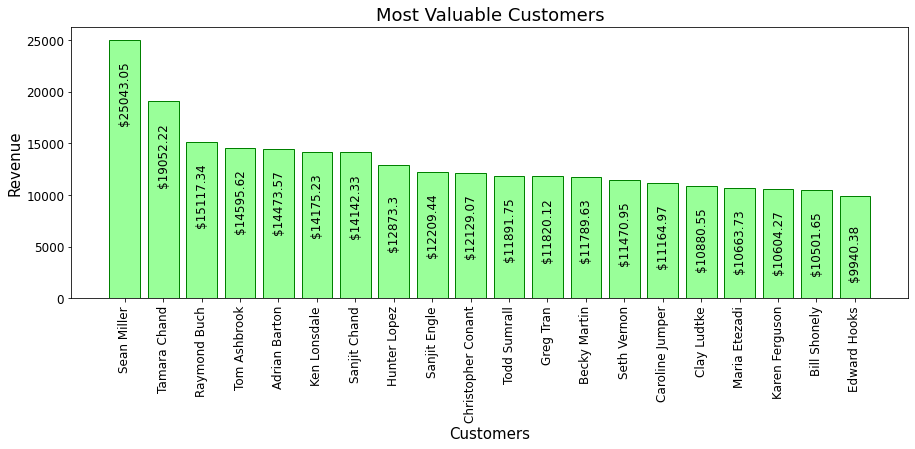

In [23]:
plt.figure(figsize = (15,5)) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.title("Most Valuable Customers", fontsize=18)
plt.xlabel("Customers",fontsize=15) 
plt.ylabel("Revenue",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items():                                    #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center') #v-8000 to place the text
                                                                                                    #inside the bar properly

`plt.text(x, y, s, fontdict=None, **kwargs)`

Parameters
----------
- x, y : float
    
    The position to place the text. By default, this is in data coordinates. The coordinate system can be changed using the *transform* parameter.

- s : str
    
    The text.

- fontdict : dict, default: None
    
    A dictionary to override the default text properties. If fontdict is None, the defaults are determined by `.rcParams`.


In [27]:
#######################################################################################

In [28]:
# 4. Similar to the most valuable customers, find out the top 10 states which generated the highest revenue.

In [29]:
# Sort the States as per the sales
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10) 

In [30]:
# Round off the Sales Value up to 2 decimal places
Top_states = Top_states[["Sales"]].round(2) 
Top_states

,Sales
State,
California,446306.46
New York,306361.15
Texas,168572.53
Washington,135206.85
Pennsylvania,116276.65
Florida,88436.53
Illinois,79236.52
Michigan,76136.07
Ohio,75130.35


In [31]:
Top_states.reset_index(inplace=True)

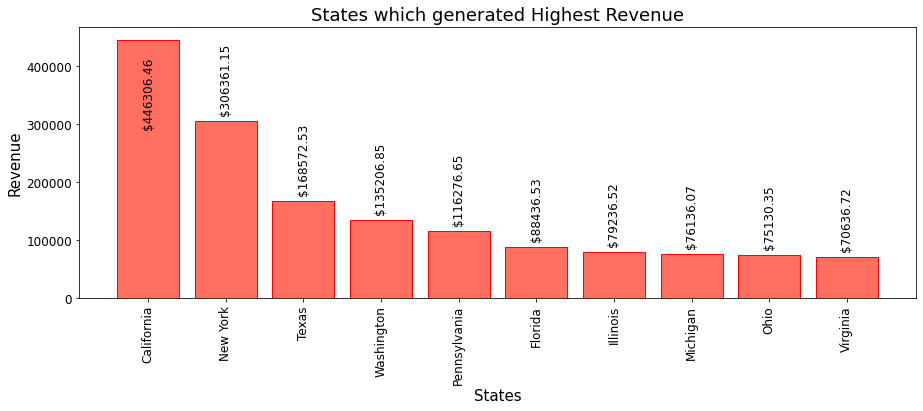

In [32]:
plt.figure(figsize = (15,5)) 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.title("States which generated Highest Revenue", fontsize=18) 
plt.xlabel("States",fontsize=15) 
plt.ylabel("Revenue",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

In [33]:
###############################################################################################

In [34]:
# 5. Which products contributed most to the revenue?

In [35]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) 

In [36]:
Top_products = Top_products[["Sales"]].round(2) 
Top_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.82
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
HON 5400 Series Task Chairs for Big and Tall,21870.58
GBC DocuBind TL300 Electric Binding System,19823.48
GBC Ibimaster 500 Manual ProClick Binding System,19024.50
Hewlett Packard LaserJet 3310 Copier,18839.69
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.90


In [37]:
Top_products.reset_index(inplace=True) 

In [38]:
# The total revenue generated by all the top products
total_revenue_products = Top_products["Sales"].sum() 
total_revenue_products

209624.83000000002

In [39]:
# Converting the total_revenue_products from float to int and then to string
total_revenue_products = str(int(total_revenue_products)) 

In [40]:
# Adding '$' sign before the Value
total_revenue_products = '$' + total_revenue_products 
total_revenue_products

'$209624'

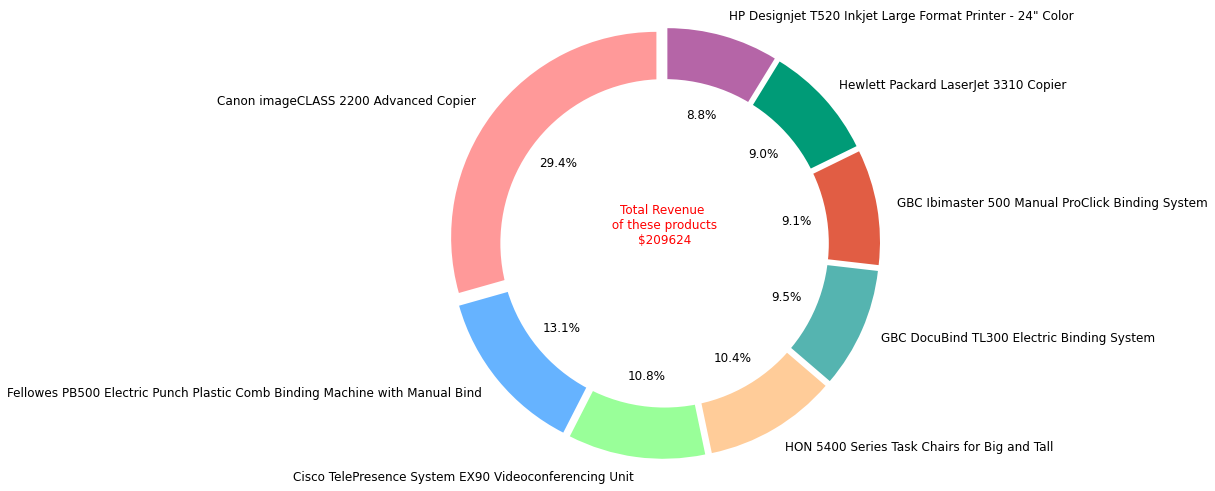

In [42]:
plt.rcParams["figure.figsize"] = (13,7) 
plt.rcParams['font.size'] = 12.0 # Font size is defined for the figure
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7'] # colors defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], 
        autopct='%1.1f%%', startangle=90, explode=explode)

centre_circle = plt.Circle((0,0),0.80,fc='white') # Drawing a circle on the pie chart
fig = plt.gcf()                                   # Gets the current figure which is the pie
fig.gca().add_artist(centre_circle)               # Get the current Axes instance on the current figure

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),
                     color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [43]:
##########################################################################################

In [47]:
# 6. Examine the correlation between "Sales" and "Segment" features.

In [44]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
df_cat

,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office
Order Date,,,,
2015-01-03,16.448,1,0,0
2015-01-04,3.540,0,0,1
2015-01-04,272.736,0,0,1
2015-01-04,11.784,0,0,1
2015-01-05,19.536,1,0,0
...,...,...,...,...
2018-12-30,20.720,0,1,0
2018-12-30,323.136,1,0,0
2018-12-30,209.300,0,0,1


In [45]:
cor_mat = df_cat.corr()
cor_mat

,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office
Sales,1.000000,-0.009483,0.002496,0.009388
Segment_Consumer,-0.009483,1.000000,-0.684237,-0.485111
Segment_Corporate,0.002496,-0.684237,1.000000,-0.305772
Segment_Home Office,0.009388,-0.485111,-0.305772,1.000000


<AxesSubplot:>

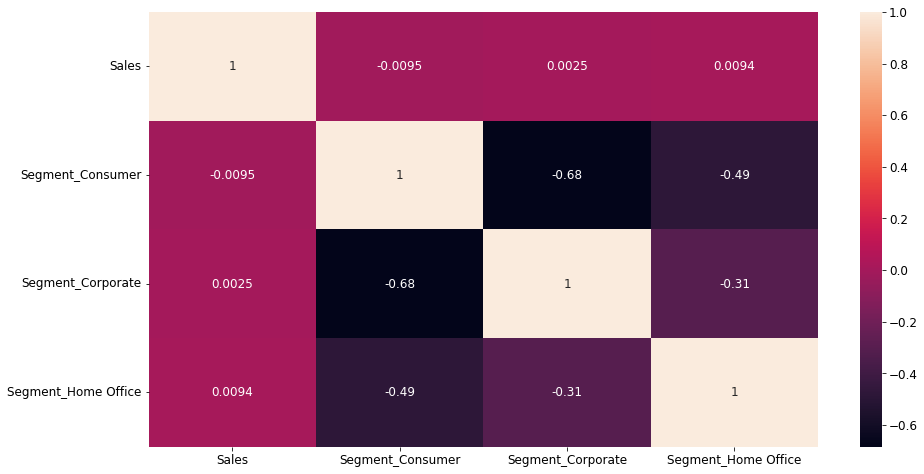

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(data = cor_mat, annot = True, cbar = True)

In [48]:
## end of notebook